In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

BASE_PATH = '/home/guillermo/Documents/SINC/RNA/analysis/AEseq2seq/'
DATA_PATH = 'notebooks/from_db/Unet/v2/'

In [3]:
sns.set_theme(style="whitegrid", palette="pastel")

In [4]:
data_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/params_best_epoch.csv')
metrics_conv = pd.read_csv(BASE_PATH + DATA_PATH + 'convolutional_layers/train_metrics.csv')
 
data_conv['compression1'] =   data_conv['arc_stride_1'] ** data_conv['arc_num_conv1']

data_conv['compression2'] = data_conv['compression1'] * data_conv['arc_stride_2'] ** data_conv['arc_num_conv2']

In [5]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1', 'compression1', 'compression2'],
      dtype='object')

In [22]:
data_conv

,run_uuid,name,best_epoch,arc_filters,arc_rank,arc_kernel,arc_stride_1,arc_stride_2,arc_num_conv1,arc_num_conv2,arc_skip_conn,hyp_lr,hyp_output_th,hyp_scheduler,best_epoch.1,train_loss,train_Accuracy,train_Accuracy_seq,train_F1,valid_loss,valid_Accuracy,valid_Accuracy_seq,valid_F1,test_loss,test_Accuracy,test_Accuracy_seq,test_F1,compression1,compression2
0,a744ed2ddfd94dedb2e69f87a3d373d1,num_convs-1-1,13,4,8,3,2,2,1,1,0,0.001,0.5,none,13,0.002191,0.999939,0.978903,0.999939,0.000597,0.999890,0.969388,0.999890,0.000531,1.000000,1.000000,1.000000,2,4
1,79bbd871db2b4a1d999a243622eb6758,num_convs-1-2,17,4,8,3,2,2,1,2,0,0.001,0.5,none,17,0.004513,0.999572,0.906118,0.999572,0.002229,0.999482,0.903061,0.999481,0.002037,0.999882,0.952586,0.999882,2,8
2,9faa38f87cb640f28d12e383737e6f30,num_convs-2-1,19,4,16,3,2,2,2,1,0,0.001,0.5,none,19,0.004616,0.999721,0.915612,0.999720,0.001418,0.999900,0.969388,0.999900,0.001354,1.000000,1.000000,1.000000,4,8
3,72931feba80a4b3b8ec0ff0975f40b22,num_convs-2-2,19,4,16,3,2,2,2,2,0,0.001,0.5,none,19,0.006489,0.999669,0.914030,0.999669,0.002538,0.999621,0.913265,0.999621,0.002360,0.999983,0.991379,0.999983,4,16
4,abe54430e3ab435ca15be66355b9f28e,num_convs-3-1,18,4,32,3,2,2,3,1,0,0.001,0.5,none,18,0.007856,0.999713,0.934599,0.999712,0.003355,0.999641,0.928571,0.999641,0.003250,0.999949,0.974138,0.999949,8,16
5,024f012af74a42eb85e1feeaec4dea4c,num_convs-3-2,19,4,32,3,2,2,3,2,0,0.001,0.5,none,19,0.021716,0.994073,0.223101,0.994042,0.024263,0.990543,0.158163,0.990473,0.022642,0.992179,0.129310,0.992143,8,32
6,35ff85fb8dd544438fb5413967afc22c,num_convs-1-1,19,4,8,3,2,2,1,1,1,0.001,0.5,none,19,0.000107,0.999996,0.997890,0.999996,0.000109,1.000000,1.000000,1.000000,0.000124,1.000000,1.000000,1.000000,2,4
7,11e774529c574646812fdb45e7f7cc9e,num_convs-1-2,19,4,8,3,2,2,1,2,1,0.001,0.5,none,19,0.000136,1.000000,1.000000,1.000000,0.000124,1.000000,1.000000,1.000000,0.000136,1.000000,1.000000,1.000000,2,8
8,dbe2392b4689468089e432e7619ee9dc,num_convs-2-1,19,4,16,3,2,2,2,1,1,0.001,0.5,none,19,0.000176,0.999984,0.993671,0.999984,0.000158,1.000000,1.000000,1.000000,0.000155,1.000000,1.000000,1.000000,4,8
9,c687d6305f5c4d978b4d3847da204260,num_convs-2-2,18,4,16,3,2,2,2,2,1,0.001,0.5,none,18,0.000177,0.999986,0.993671,0.999986,0.000169,1.000000,1.000000,1.000000,0.000175,1.000000,1.000000,1.000000,4,16


In [6]:
data_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/params_best_epoch.csv')
metrics_pool = pd.read_csv(BASE_PATH + DATA_PATH + 'pooling_layers/train_metrics.csv')

data_pool['compression1'] =   2 ** data_pool['arc_num_conv1']
data_pool['compression2'] =  data_pool['compression1'] * 2 ** data_pool['arc_num_conv2']
 
data_pool['name'] = data_pool['name'].apply(lambda x: x[x.index('num_convs'):])

data_conv['name'] = data_conv['name'].apply(lambda x: x[x.index('num_convs'):])

In [7]:
data_c_skips = data_conv[data_conv['arc_skip_conn'] == 1]
data_pool_skips = data_pool[data_pool['arc_skip_conn'] == 1]
data_c_no_skips = data_conv[data_conv['arc_skip_conn'] == 0]
data_pool_no_skips = data_pool[data_pool['arc_skip_conn'] == 0]

In [8]:
data_conv.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1', 'compression1', 'compression2'],
      dtype='object')

In [9]:
data_conv[['name', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['arc_rank', 'arc_skip_conn'])

,name,arc_filters,arc_rank,arc_num_conv1,arc_num_conv2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
0,num_convs-1-1,4,8,1,1,0,13,0.999939,0.999890,1.000000
1,num_convs-1-2,4,8,1,2,0,17,0.999572,0.999482,0.999882
6,num_convs-1-1,4,8,1,1,1,19,0.999996,1.000000,1.000000
7,num_convs-1-2,4,8,1,2,1,19,1.000000,1.000000,1.000000
2,num_convs-2-1,4,16,2,1,0,19,0.999721,0.999900,1.000000
3,num_convs-2-2,4,16,2,2,0,19,0.999669,0.999621,0.999983
8,num_convs-2-1,4,16,2,1,1,19,0.999984,1.000000,1.000000
9,num_convs-2-2,4,16,2,2,1,18,0.999986,1.000000,1.000000
4,num_convs-3-1,4,32,3,1,0,18,0.999713,0.999641,0.999949
5,num_convs-3-2,4,32,3,2,0,19,0.994073,0.990543,0.992179


In [10]:
data_pool[['run_uuid','name', 'arc_filters', 'arc_rank',  'arc_num_conv1','arc_num_conv2', 'arc_skip_conn', 'best_epoch','train_Accuracy', 'valid_Accuracy', 'test_Accuracy']].sort_values(['name','arc_rank', 'arc_skip_conn']).query('best_epoch >2')

,run_uuid,name,arc_filters,arc_rank,arc_num_conv1,arc_num_conv2,arc_skip_conn,best_epoch,train_Accuracy,valid_Accuracy,test_Accuracy
0,8afe65f58de84eabbfd4b76921f13285,num_convs-1-1,4,8,1,1,0,17,0.992035,0.991241,0.988340
9,181c5f350c01442093c89c5889e1e5c5,num_convs-1-1,4,8,1,1,1,18,0.999853,0.999900,0.999672
1,ecf3cff322d5488493309c89730b98ef,num_convs-1-2,4,8,1,2,0,19,0.925779,0.906340,0.908498
10,e004e64ed7394f0faa0e0e3b2f4ad971,num_convs-1-2,4,8,1,2,1,17,0.998774,0.998605,0.998855
2,f267f3a4346f48a9b6a8e652634232b3,num_convs-1-3,4,8,1,3,0,18,0.871350,0.846889,0.846663
11,ab635feab463446baf4a77ac25c55ec3,num_convs-1-3,4,8,1,3,1,18,0.999213,0.999004,0.999066
3,a192abf37c7d4da59201a189c40de13a,num_convs-2-1,4,16,2,1,0,17,0.976785,0.964425,0.962992
12,f97143a61251440eae13a9c0146b5c85,num_convs-2-1,4,16,2,1,1,19,0.996911,0.993463,0.993720
4,fd35bd3bfb374d27b182f8c4abec0974,num_convs-2-2,4,16,2,2,0,17,0.895994,0.851692,0.858609
13,57fb935ecb104b5895b589806b3570d8,num_convs-2-2,4,16,2,2,1,18,0.975618,0.960250,0.961005


# conv analysis


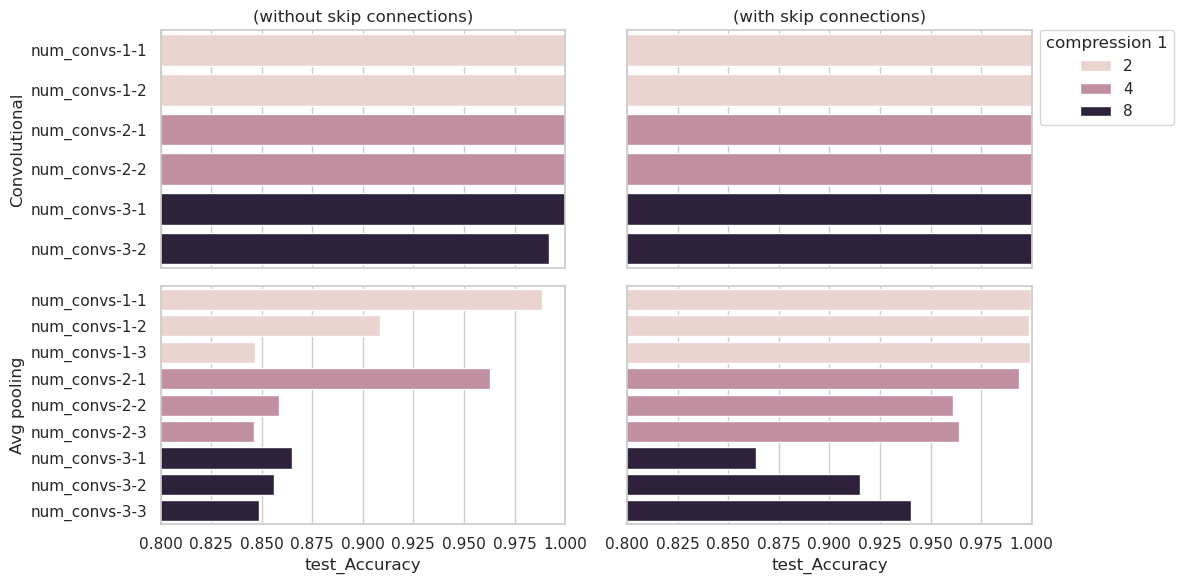

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6), sharex=True)


order = ['compression1','compression2'] 
hue = 'compression1'
g = sns.barplot(data=data_c_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue,legend=False,  ax=axes[0, 0])
g.set_title('(without skip connections)') 
g.set_xlim([0.8, 1])

g.set(ylabel='Convolutional')

g = sns.barplot(data=data_c_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, ax=axes[0, 1])
g.set_title('(with skip connections)')
g.legend(title = 'compression 1',bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])
g.set_yticklabels([])
g.set(ylabel='')


g = sns.barplot(data=data_pool_no_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, legend=False, ax=axes[1, 0])
g.set_xlim([0.8, 1])
g.set(ylabel='Avg pooling')

g = sns.barplot(data=data_pool_skips.sort_values(by=order), x='test_Accuracy', y='name', hue=hue, legend=False,  ax=axes[1, 1])
g.set_yticklabels([])
g.set(ylabel='')

g.set_xlim([0.8, 1])
fig.tight_layout()

(0.8, 1.0)

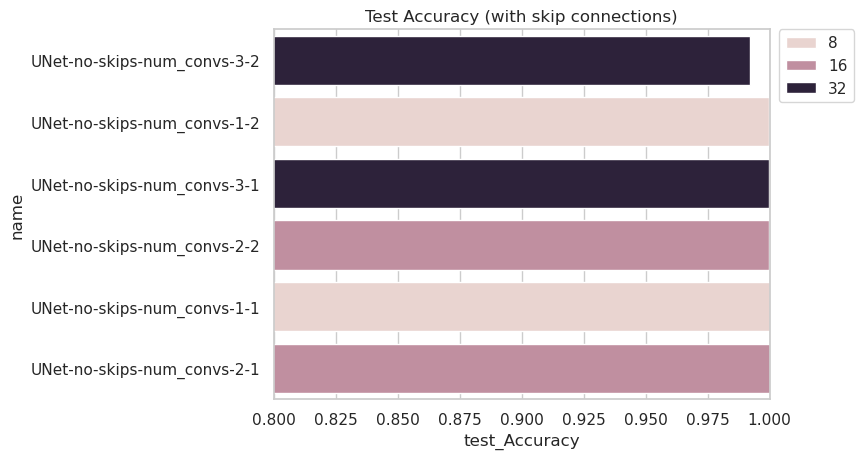

In [73]:
g = sns.barplot(data=data_c_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

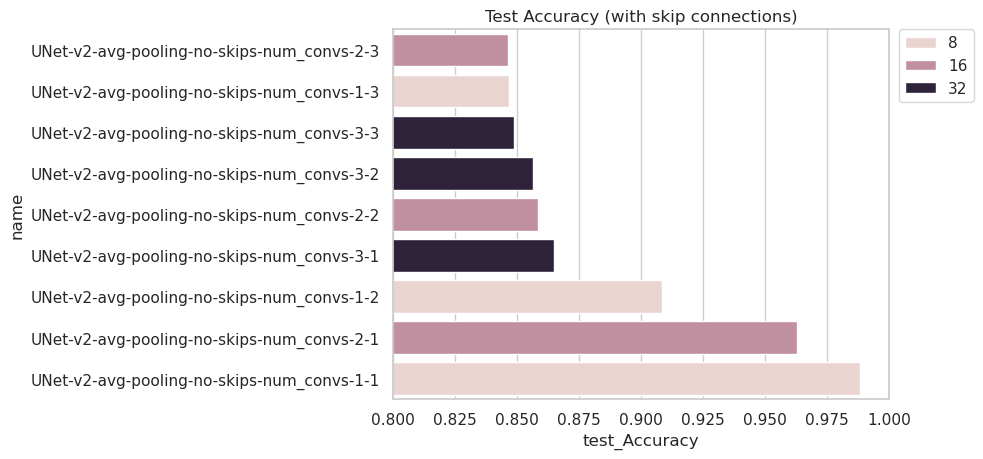

In [84]:
g = sns.barplot(data=data_pool_no_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

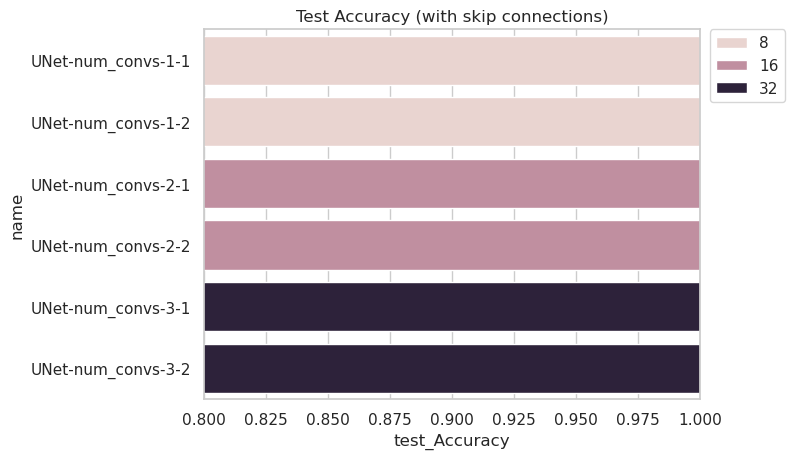

In [75]:
g = sns.barplot(data=data_c_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

(0.8, 1.0)

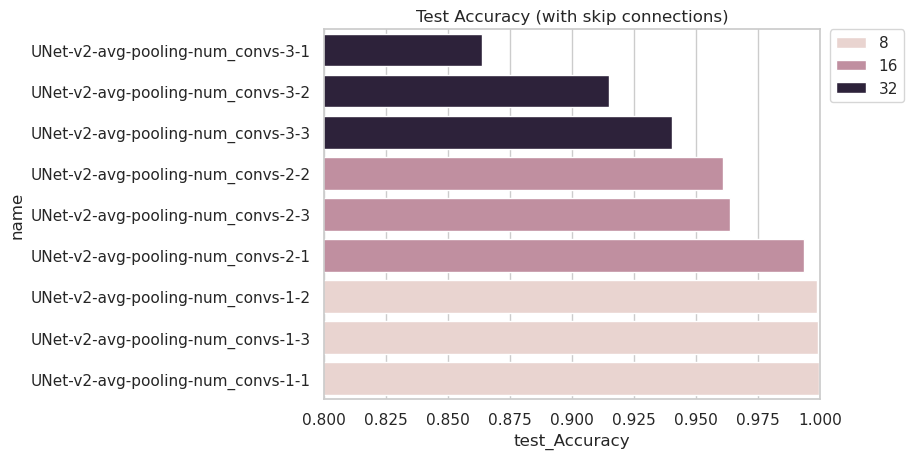

In [74]:
g = sns.barplot(data=data_pool_skips.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_rank')
g.set_title('Test Accuracy (with skip connections)')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.set_xlim([0.8, 1])

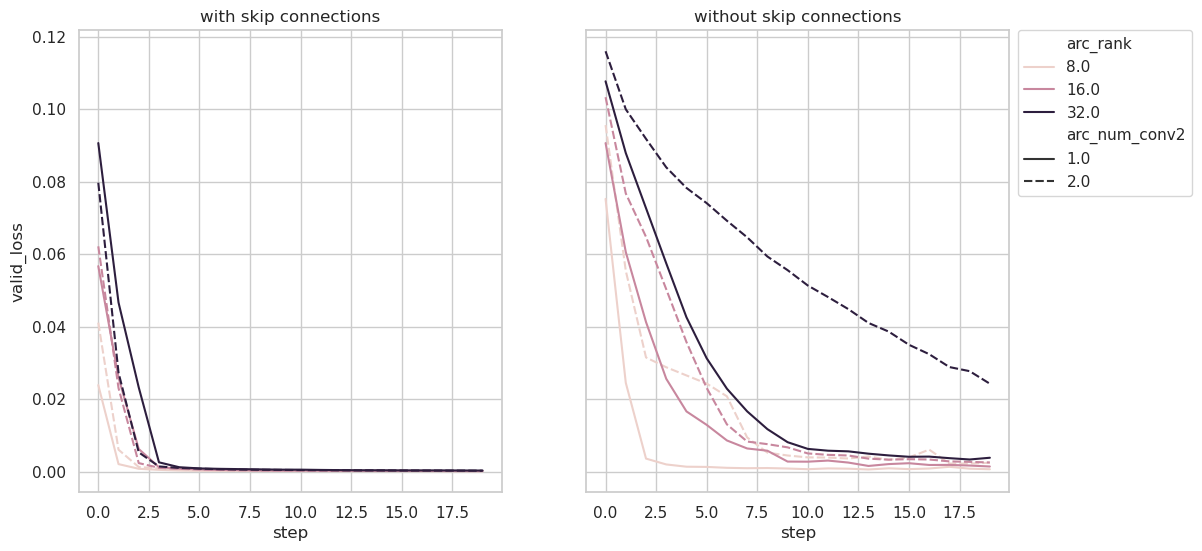

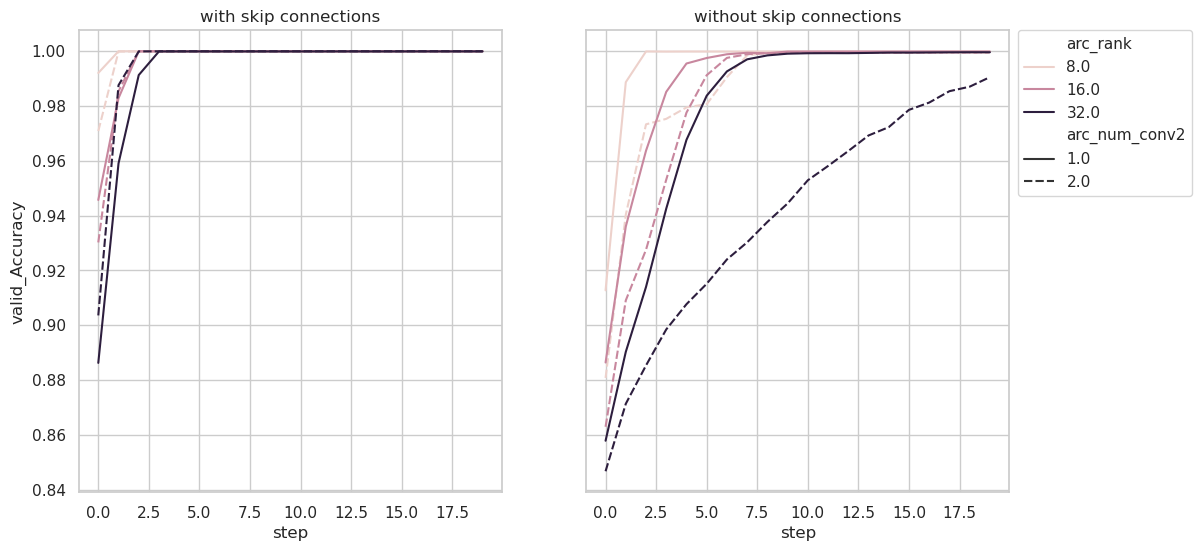

In [28]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'compression1','compression2', 'arc_skip_conn']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_loss', style='arc_num_conv2', hue='arc_rank', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_loss', style='arc_num_conv2', hue='arc_rank', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_skips, x='step', y='valid_Accuracy', style='arc_num_conv2', hue='arc_rank', ax=ax[0], legend=False)
# g.grid()
g.set_title('with skip connections')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy', style='arc_num_conv2', hue='arc_rank', ax=ax[1])
f.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# f.grid()
f.set_title('without skip connections')

plt.show()

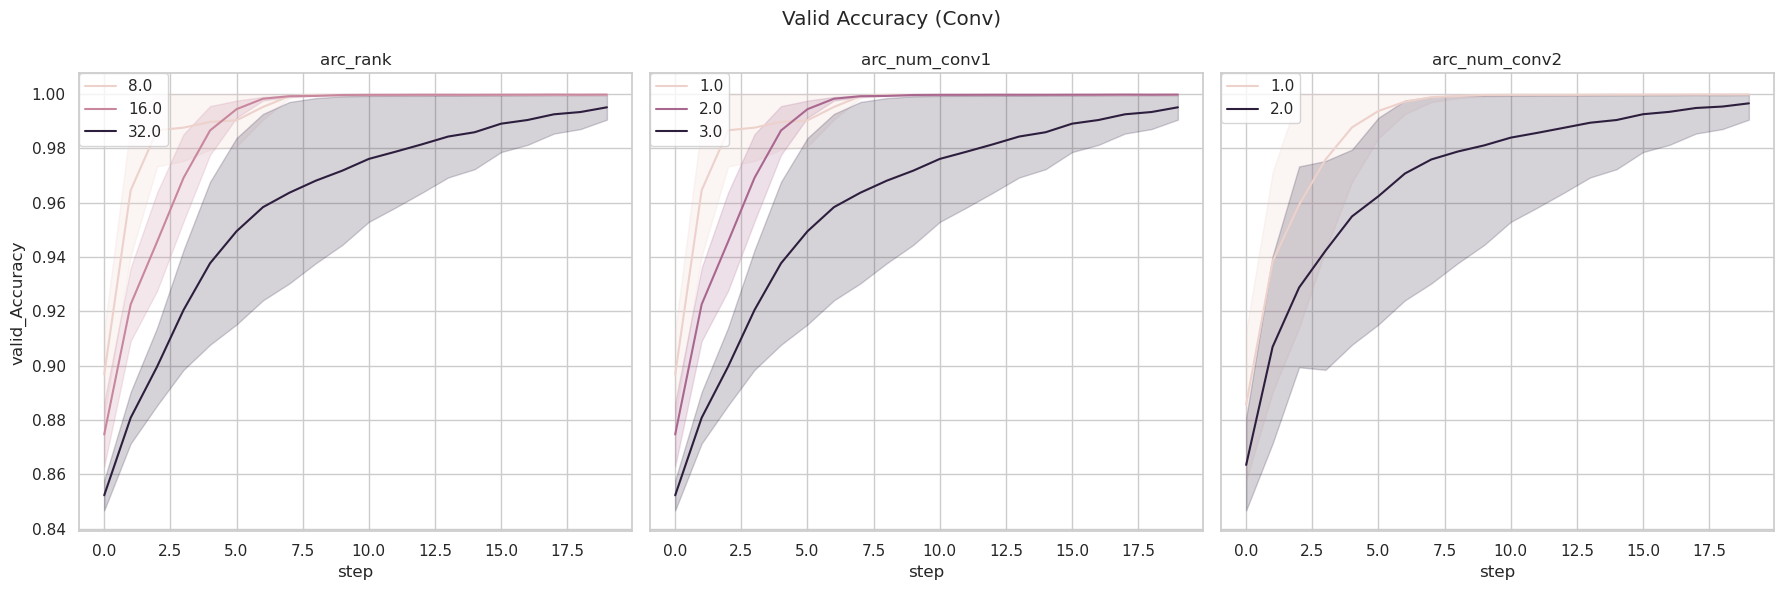

In [37]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'compression1','compression2', 'arc_skip_conn']
metrics_skips = pd.merge(metrics_conv, data_c_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_conv, data_c_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_rank', ax=ax[0] )

g.legend(loc='upper left', borderaxespad=0.)
g.set_title('arc_rank')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_num_conv1', ax=ax[1])
f.legend(loc='upper left', borderaxespad=0.)
f.set_title('arc_num_conv1')


f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_num_conv2', ax=ax[2])
f.set_title('arc_num_conv2')
f.legend(loc='upper left', borderaxespad=0.)

fig.suptitle('Valid Accuracy (Conv)')
fig.tight_layout()


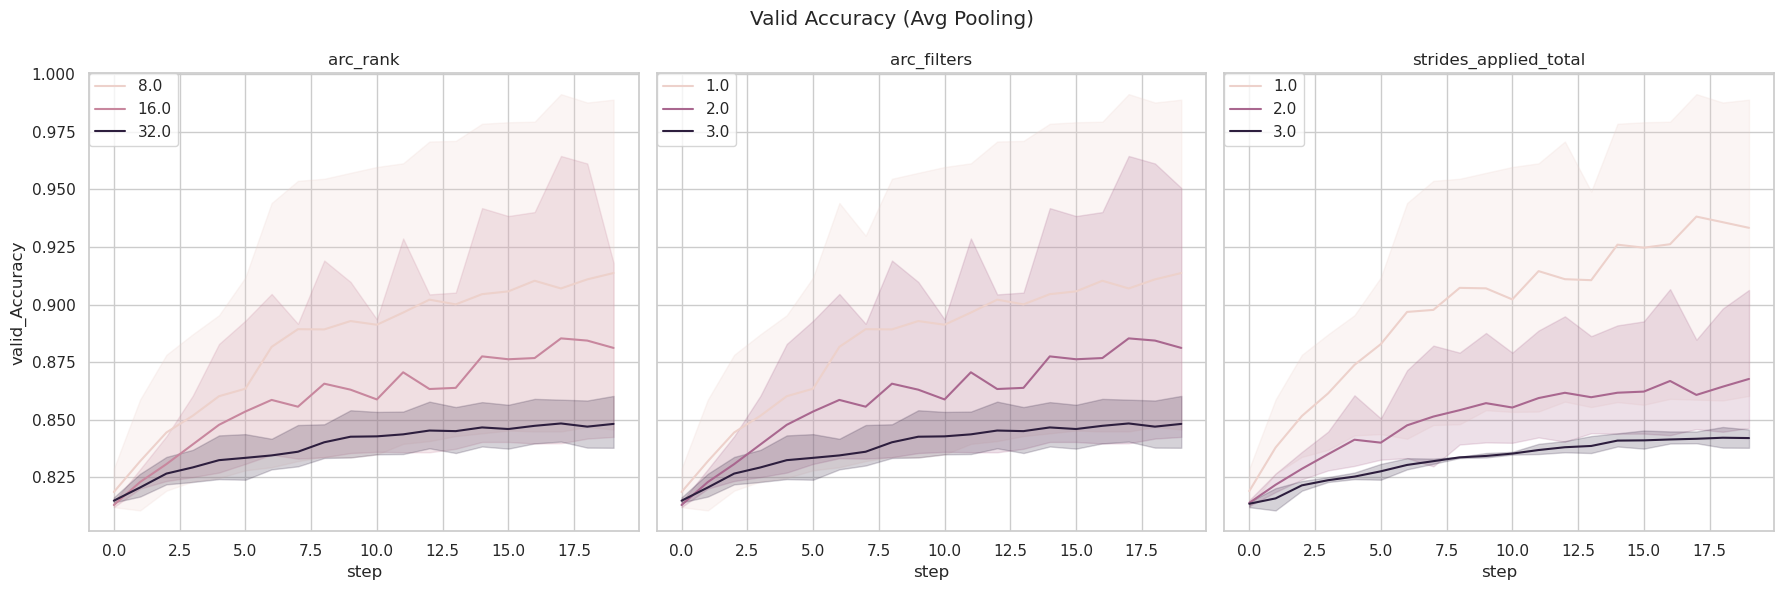

: 

In [ ]:
cols = ['run_uuid', 'arc_filters', 'arc_rank', 'arc_num_conv1','arc_num_conv2', 'compression1','compression2', 'arc_skip_conn']
metrics_skips = pd.merge(metrics_pool, data_pool_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')
metrics_no_skips = pd.merge(metrics_pool, data_pool_no_skips[cols], how='left', left_on='run_uuid', right_on='run_uuid')

fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharey=True, sharex=True)
g = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_rank', ax=ax[0] )

g.legend(loc='upper left', borderaxespad=0.)
g.set_title('arc_rank')

f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_num_conv1', ax=ax[1])
f.legend(loc='upper left', borderaxespad=0.)
f.set_title('arc_num_conv1')


f = sns.lineplot(data=metrics_no_skips, x='step', y='valid_Accuracy',   hue='arc_num_conv2', ax=ax[2])
f.set_title('arc_num_conv2')
f.legend(loc='upper left', borderaxespad=0.)

fig.suptitle('Valid Accuracy (Avg Pooling)')
fig.tight_layout()
